In [1]:
# prompt: mount to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Heatmap & denogram (similarity tree) based on sequence similarity score

##pla2g1

Saving results.tsv to results (5).tsv


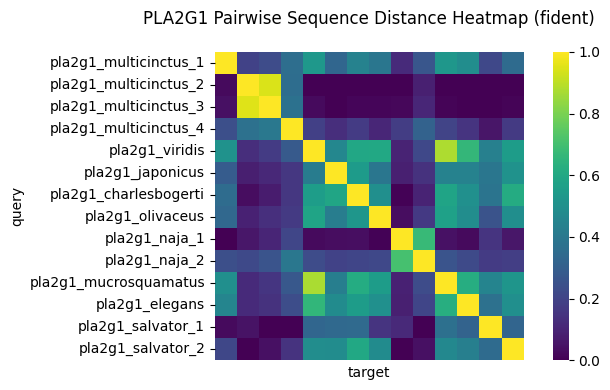

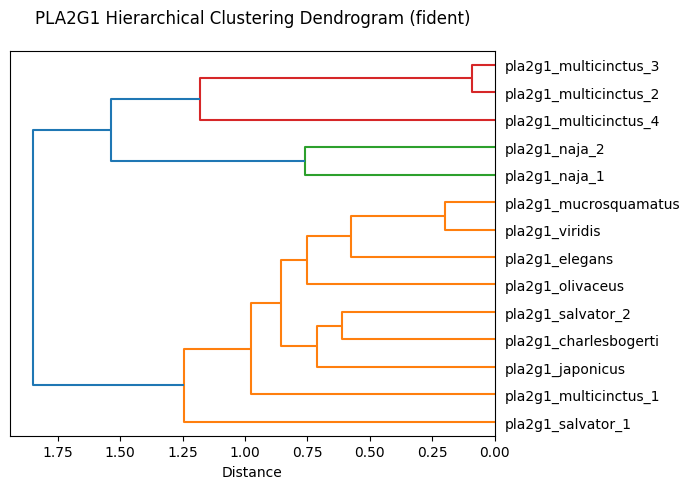

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load MMseqs2 results
df = pd.read_csv(filename, sep='\t', header=None)
df.columns = ["query", "target", "fident", "alnlen", "mismatch", "gapopen",
              "qstart", "qend", "tstart", "tend", "evalue", "bits"]

# Remove self-hits
df = df[df["query"] != df["target"]]

# Convert similarity to distance (fident → similarity; we'll rescale later)
df["distance"] = df["fident"]

# Pivot into square distance matrix
distance_matrix = df.pivot(index="query", columns="target", values="distance")

# Make it symmetric and fill in missing values
all_ids = sorted(set(df["query"]) | set(df["target"]))
distance_matrix = distance_matrix.reindex(index=all_ids, columns=all_ids)
distance_matrix = distance_matrix.fillna(distance_matrix.T)
distance_matrix = distance_matrix.fillna(1)  # worst similarity = most distant
distance_matrix = (distance_matrix - distance_matrix.min()) / (distance_matrix.max() - distance_matrix.min())

# ---------- 🔹 1. Clean and apply shortened labels ----------
def shorten_label(label):
    parts = label.split("_")
    if len(parts) >= 2:
        genus = parts[0]
        rest = [p for p in parts[2:] if p.lower() != "kuwap"]  # Skip "kuwap"
        # Replace 'typeX' with 'tX' and 'exonX' with 'exX'
        rest = [p.replace("type", "t").replace("exon", "ex") for p in rest]
        return "_".join([genus] + rest)
    return label

# Create label mapping
label_map = {old: shorten_label(old) for old in distance_matrix.index}
distance_matrix.index = distance_matrix.index.map(label_map)
distance_matrix.columns = distance_matrix.columns.map(label_map)

# ---------- 🔹 2. Heatmap with consistent labels ----------

plt.figure(figsize=(7, 4))
sns.heatmap(distance_matrix, cmap="viridis", square=True, vmin=0, vmax=1, xticklabels=False)
plt.title("PLA2G1 Pairwise Sequence Distance Heatmap (fident)", fontsize=12, pad=20, loc='center')  # 👈 Centered + spaced
plt.yticks(fontsize=10)
plt.xticks([], [])
plt.tight_layout()
plt.show()



# ---------- 🔹 3. Dendrogram with same cleaned labels ----------
linked = linkage(distance_matrix, method='average')

plt.figure(figsize=(7, 5))
dendrogram(linked,
           labels=distance_matrix.index.tolist(),  # same cleaned labels
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)

plt.title("PLA2G1 Hierarchical Clustering Dendrogram (fident)", fontsize=12, pad=20, loc='center')
plt.xlabel("Distance", fontsize=10)
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()


##pla2g3

Saving results_pla2g3.tsv to results_pla2g3 (1).tsv


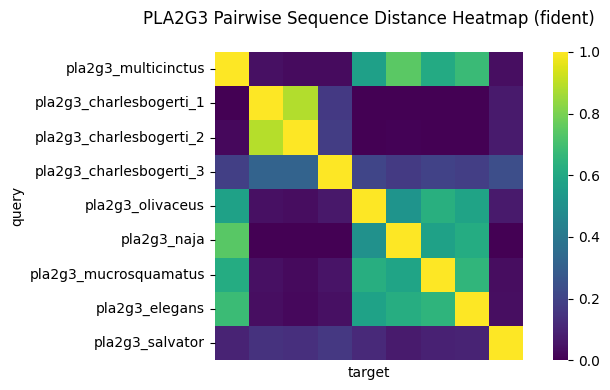

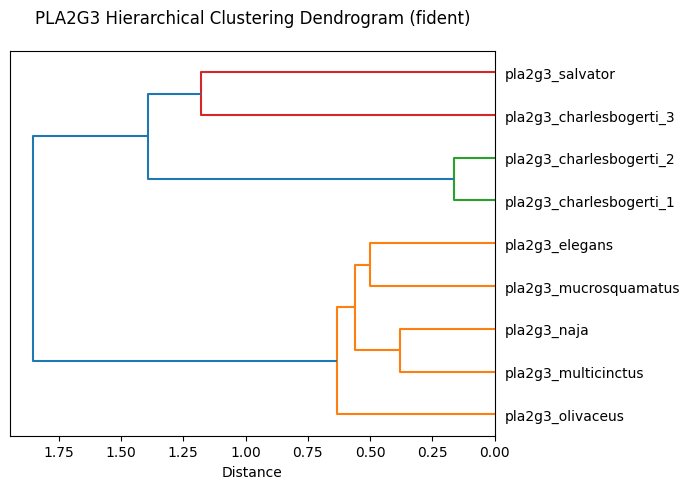

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load MMseqs2 results
df = pd.read_csv(filename, sep='\t', header=None)
df.columns = ["query", "target", "fident", "alnlen", "mismatch", "gapopen",
              "qstart", "qend", "tstart", "tend", "evalue", "bits"]

# Remove self-hits
df = df[df["query"] != df["target"]]

# Convert similarity to distance (fident → similarity; we'll rescale later)
df["distance"] = df["fident"]

# Pivot into square distance matrix
distance_matrix = df.pivot(index="query", columns="target", values="distance")

# Make it symmetric and fill in missing values
all_ids = sorted(set(df["query"]) | set(df["target"]))
distance_matrix = distance_matrix.reindex(index=all_ids, columns=all_ids)
distance_matrix = distance_matrix.fillna(distance_matrix.T)
distance_matrix = distance_matrix.fillna(1)  # worst similarity = most distant
distance_matrix = (distance_matrix - distance_matrix.min()) / (distance_matrix.max() - distance_matrix.min())

# ---------- 🔹 1. Clean and apply shortened labels ----------
def shorten_label(label):
    parts = label.split("_")
    if len(parts) >= 2:
        genus = parts[0]
        rest = [p for p in parts[2:] if p.lower() != "kuwap"]  # Skip "kuwap"
        # Replace 'typeX' with 'tX' and 'exonX' with 'exX'
        rest = [p.replace("type", "t").replace("exon", "ex") for p in rest]
        return "_".join([genus] + rest)
    return label

# Create label mapping
label_map = {old: shorten_label(old) for old in distance_matrix.index}
distance_matrix.index = distance_matrix.index.map(label_map)
distance_matrix.columns = distance_matrix.columns.map(label_map)

# ---------- 🔹 2. Heatmap with consistent labels ----------

plt.figure(figsize=(7, 4))
sns.heatmap(distance_matrix, cmap="viridis", square=True, vmin=0, vmax=1, xticklabels=False)
plt.title("PLA2G3 Pairwise Sequence Distance Heatmap (fident)", fontsize=12, pad=20, loc='center')  # 👈 Centered + spaced
plt.yticks(fontsize=10)
plt.xticks([], [])
plt.tight_layout()
plt.show()



# ---------- 🔹 3. Dendrogram with same cleaned labels ----------
linked = linkage(distance_matrix, method='average')

plt.figure(figsize=(7, 5))
dendrogram(linked,
           labels=distance_matrix.index.tolist(),  # same cleaned labels
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)

plt.title("PLA2G3 Hierarchical Clustering Dendrogram (fident)", fontsize=12, pad=20, loc='center')
plt.xlabel("Distance", fontsize=10)
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()

##Short Kunitz v2

Saving shortK_SON.tsv to shortK_SON.tsv


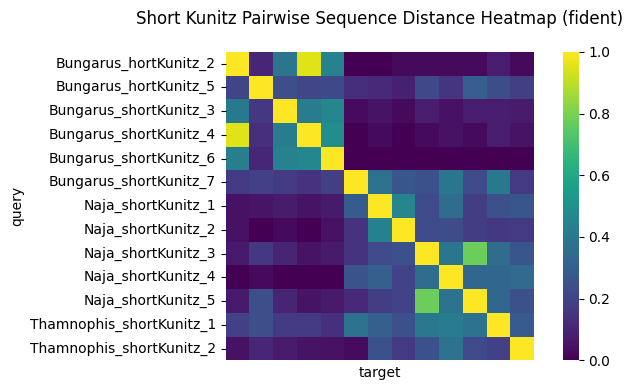

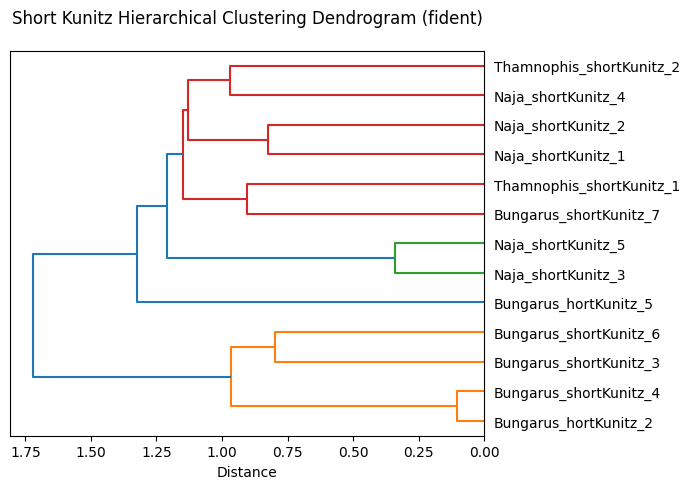

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load MMseqs2 results
df = pd.read_csv(filename, sep='\t', header=None)
df.columns = ["query", "target", "fident", "alnlen", "mismatch", "gapopen",
              "qstart", "qend", "tstart", "tend", "evalue", "bits"]

# Remove self-hits
df = df[df["query"] != df["target"]]

# Convert similarity to distance (fident → similarity; we'll rescale later)
df["distance"] = df["fident"]

# Pivot into square distance matrix
distance_matrix = df.pivot(index="query", columns="target", values="distance")

# Make it symmetric and fill in missing values
all_ids = sorted(set(df["query"]) | set(df["target"]))
distance_matrix = distance_matrix.reindex(index=all_ids, columns=all_ids)
distance_matrix = distance_matrix.fillna(distance_matrix.T)
distance_matrix = distance_matrix.fillna(1)  # worst similarity = most distant
distance_matrix = (distance_matrix - distance_matrix.min()) / (distance_matrix.max() - distance_matrix.min())

# ---------- 🔹 1. Clean and apply shortened labels ----------
def shorten_label(label):
    parts = label.split("_")
    if len(parts) >= 2:
        genus = parts[0]
        rest = [p for p in parts[2:] if p.lower() != "kuwap"]  # Skip "kuwap"
        # Replace 'typeX' with 'tX' and 'exonX' with 'exX'
        rest = [p.replace("type", "t").replace("exon", "ex") for p in rest]
        return "_".join([genus] + rest)
    return label

# Create label mapping
label_map = {old: shorten_label(old) for old in distance_matrix.index}
distance_matrix.index = distance_matrix.index.map(label_map)
distance_matrix.columns = distance_matrix.columns.map(label_map)

# ---------- 🔹 2. Heatmap with consistent labels ----------

plt.figure(figsize=(7, 4))
sns.heatmap(distance_matrix, cmap="viridis", square=True, vmin=0, vmax=1, xticklabels=False)
plt.title("Short Kunitz Pairwise Sequence Distance Heatmap (fident)", fontsize=12, pad=20, loc='center')  # 👈 Centered + spaced
plt.yticks(fontsize=10)
plt.xticks([], [])
plt.tight_layout()
plt.show()



# ---------- 🔹 3. Dendrogram with same cleaned labels ----------
linked = linkage(distance_matrix, method='average')

plt.figure(figsize=(7, 5))
dendrogram(linked,
           labels=distance_matrix.index.tolist(),  # same cleaned labels
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)

plt.title("Short Kunitz Hierarchical Clustering Dendrogram (fident)", fontsize=12, pad=20, loc='center')
plt.xlabel("Distance", fontsize=10)
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()

##kuwap v2

Saving shortKunitz.tsv to shortKunitz.tsv


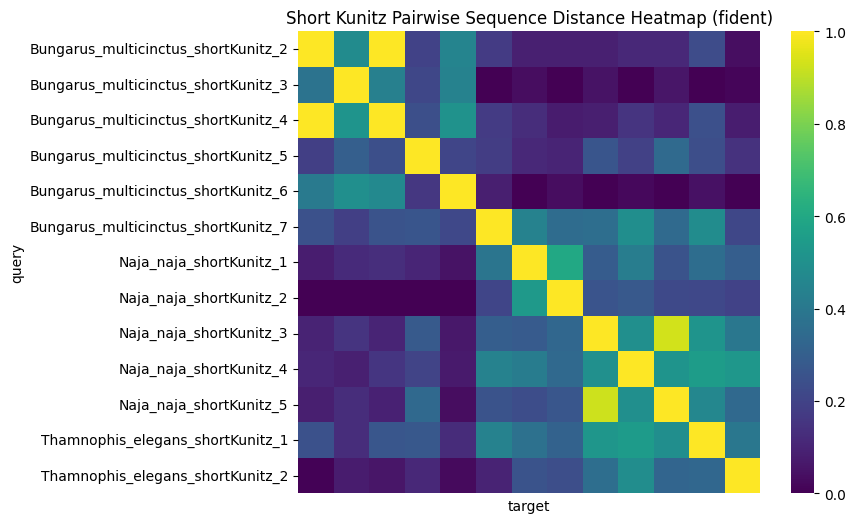

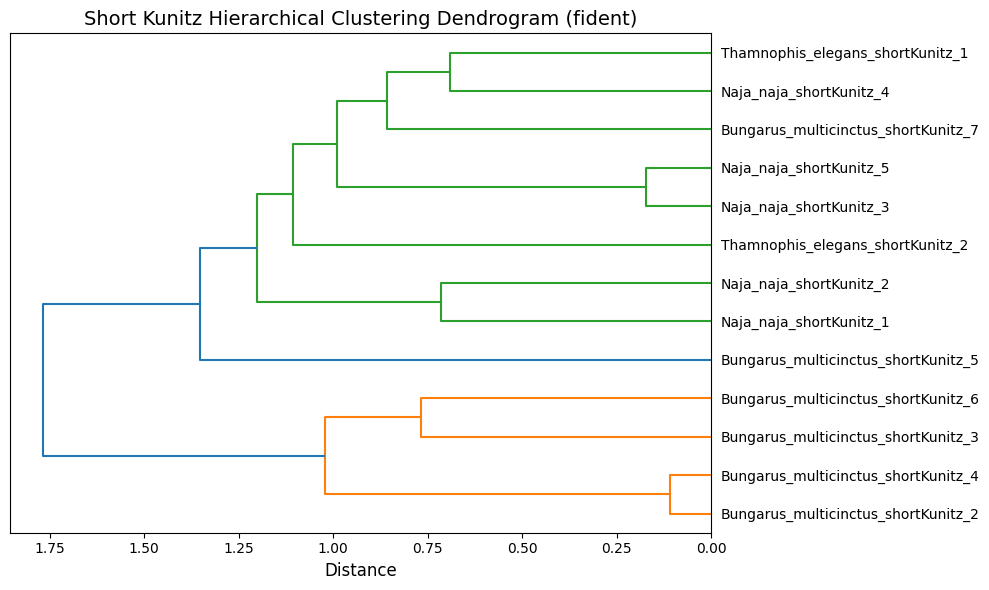

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load MMseqs2 results
df = pd.read_csv(filename, sep='\t', header=None)
df.columns = ["query", "target", "fident", "alnlen", "mismatch", "gapopen",
              "qstart", "qend", "tstart", "tend", "evalue", "bits"]

# Remove self-hits
df = df[df["query"] != df["target"]]

# Convert similarity to distance
df["distance"] = df["fident"]

# Pivot into square distance matrix
distance_matrix = df.pivot(index="query", columns="target", values="distance")

# Make it symmetric by filling both upper and lower triangles
all_ids = sorted(set(df["query"]) | set(df["target"]))
distance_matrix = distance_matrix.reindex(index=all_ids, columns=all_ids)
distance_matrix = distance_matrix.fillna(distance_matrix.T)  # fill missing with transpose

# Fill any remaining NaNs with max distance (worst case)
distance_matrix = distance_matrix.fillna(1)
distance_matrix = (distance_matrix - distance_matrix.min())/(distance_matrix.max() - distance_matrix.min())
# ---------- 🔹 1. Visualize distance matrix heatmap ----------
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, cmap="viridis", square=True, vmin=0, vmax=1)
plt.title("Short Kunitz Pairwise Sequence Distance Heatmap (fident)")
plt.xticks([], [])
plt.show()


# 🔹 3. Dendrogram with colored branches & white background 🔹
linked = linkage(distance_matrix, method='average')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=distance_matrix.index.tolist(),
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)  # bring back automatic branch colors

plt.title("Short Kunitz Hierarchical Clustering Dendrogram (fident)", fontsize=14)
plt.xlabel("Distance", fontsize=12)
plt.gca().set_facecolor('white')  # force white background
plt.grid(False)
plt.tight_layout()
plt.show()

Saving kuwap_deneme2_results.tsv to kuwap_deneme2_results (16).tsv


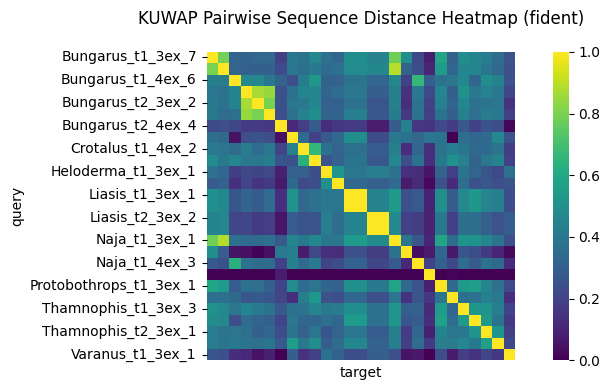

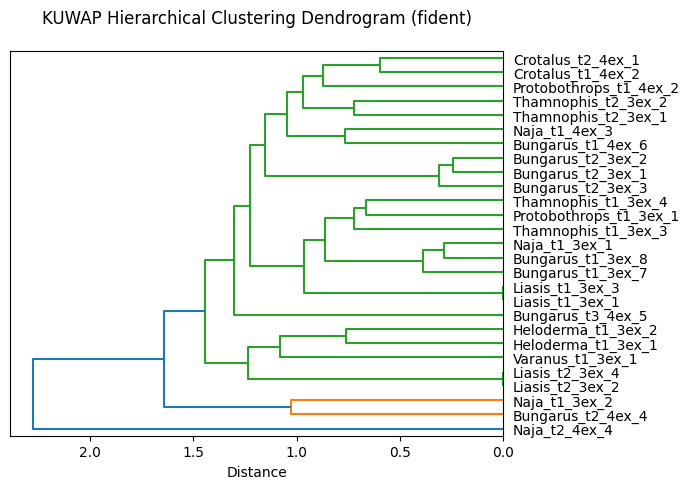

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load MMseqs2 results
df = pd.read_csv(filename, sep='\t', header=None)
df.columns = ["query", "target", "fident", "alnlen", "mismatch", "gapopen",
              "qstart", "qend", "tstart", "tend", "evalue", "bits"]

# Remove self-hits
df = df[df["query"] != df["target"]]

# Convert similarity to distance (fident → similarity; we'll rescale later)
df["distance"] = df["fident"]

# Pivot into square distance matrix
distance_matrix = df.pivot(index="query", columns="target", values="distance")

# Make it symmetric and fill in missing values
all_ids = sorted(set(df["query"]) | set(df["target"]))
distance_matrix = distance_matrix.reindex(index=all_ids, columns=all_ids)
distance_matrix = distance_matrix.fillna(distance_matrix.T)
distance_matrix = distance_matrix.fillna(1)  # worst similarity = most distant
distance_matrix = (distance_matrix - distance_matrix.min()) / (distance_matrix.max() - distance_matrix.min())

# ---------- 🔹 1. Clean and apply shortened labels ----------
def shorten_label(label):
    parts = label.split("_")
    if len(parts) >= 2:
        genus = parts[0]
        rest = [p for p in parts[2:] if p.lower() != "kuwap"]  # Skip "kuwap"
        # Replace 'typeX' with 'tX' and 'exonX' with 'exX'
        rest = [p.replace("type", "t").replace("exon", "ex") for p in rest]
        return "_".join([genus] + rest)
    return label

# Create label mapping
label_map = {old: shorten_label(old) for old in distance_matrix.index}
distance_matrix.index = distance_matrix.index.map(label_map)
distance_matrix.columns = distance_matrix.columns.map(label_map)

# ---------- 🔹 2. Heatmap with consistent labels ----------
plt.figure(figsize=(8, 4))
sns.heatmap(distance_matrix, cmap="viridis", square=True, vmin=0, vmax=1, xticklabels=False)
plt.title("KUWAP Pairwise Sequence Distance Heatmap (fident)", fontsize=12, pad=20, loc='center')
plt.yticks(fontsize=10)
plt.xticks([], [])
plt.tight_layout()
plt.show()

# ---------- 🔹 3. Dendrogram with same cleaned labels ----------
linked = linkage(distance_matrix, method='average')

plt.figure(figsize=(7, 5))
dendrogram(linked,
           labels=distance_matrix.index.tolist(),  # same cleaned labels
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)

plt.title("KUWAP Hierarchical Clustering Dendrogram (fident)", fontsize=12, pad=20, loc='center')
plt.xlabel("Distance", fontsize=10)
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()



##Hyal1

Saving lao_SON.tsv to lao_SON.tsv


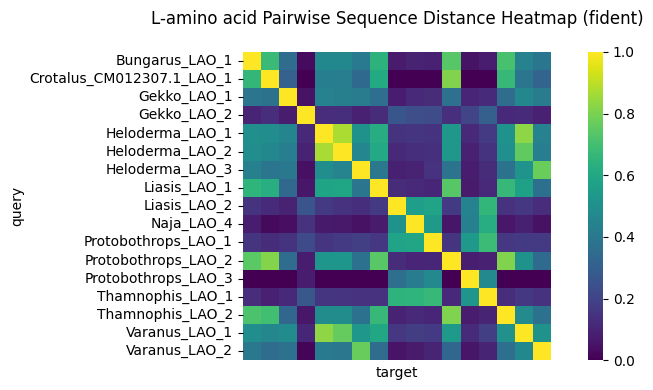

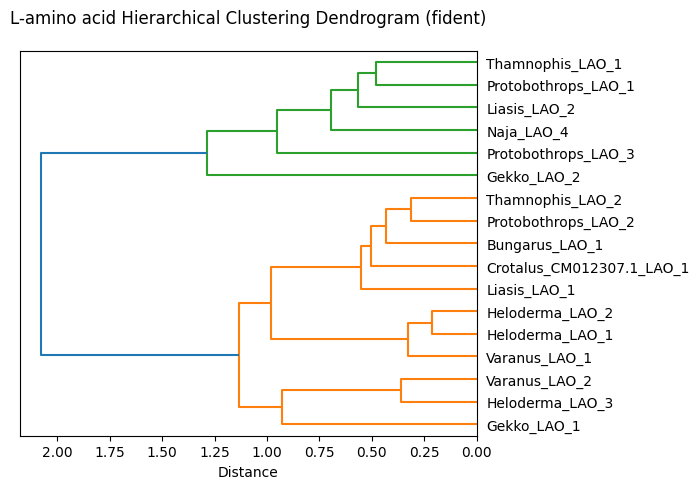

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load MMseqs2 results
df = pd.read_csv(filename, sep='\t', header=None)
df.columns = ["query", "target", "fident", "alnlen", "mismatch", "gapopen",
              "qstart", "qend", "tstart", "tend", "evalue", "bits"]

# Remove self-hits
df = df[df["query"] != df["target"]]

# Keep only best hit per query-target pair (highest fident)
df = df.sort_values("fident", ascending=False).drop_duplicates(subset=["query", "target"])

# Convert similarity to distance (fident → similarity; we'll rescale later)
df["distance"] = df["fident"]

# Pivot into square distance matrix
distance_matrix = df.pivot(index="query", columns="target", values="distance")


# Make it symmetric and fill in missing values
all_ids = sorted(set(df["query"]) | set(df["target"]))
distance_matrix = distance_matrix.reindex(index=all_ids, columns=all_ids)
distance_matrix = distance_matrix.fillna(distance_matrix.T)
distance_matrix = distance_matrix.fillna(1)  # worst similarity = most distant
distance_matrix = (distance_matrix - distance_matrix.min()) / (distance_matrix.max() - distance_matrix.min())

# ---------- 🔹 1. Clean and apply shortened labels ----------
def shorten_label(label):
    parts = label.split("_")
    if len(parts) >= 2:
        genus = parts[0]
        rest = [p for p in parts[2:] if p.lower() != "kuwap"]  # Skip "kuwap"
        # Replace 'typeX' with 'tX' and 'exonX' with 'exX'
        rest = [p.replace("type", "t").replace("exon", "ex") for p in rest]
        return "_".join([genus] + rest)
    return label

# Create label mapping
label_map = {old: shorten_label(old) for old in distance_matrix.index}
distance_matrix.index = distance_matrix.index.map(label_map)
distance_matrix.columns = distance_matrix.columns.map(label_map)

# ---------- 🔹 2. Heatmap with consistent labels ----------
plt.figure(figsize=(8, 4))
sns.heatmap(distance_matrix, cmap="viridis", square=True, vmin=0, vmax=1, xticklabels=False)
plt.title("L-amino acid Pairwise Sequence Distance Heatmap (fident)", fontsize=12, pad=20, loc='center')
plt.yticks(fontsize=10)
plt.xticks([], [])
plt.tight_layout()
plt.show()

# ---------- 🔹 3. Dendrogram with same cleaned labels ----------
linked = linkage(distance_matrix, method='average')

plt.figure(figsize=(7, 5))
dendrogram(linked,
           labels=distance_matrix.index.tolist(),  # same cleaned labels
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)

plt.title("L-amino acid Hierarchical Clustering Dendrogram (fident)", fontsize=12, pad=20, loc='center')
plt.xlabel("Distance", fontsize=10)
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()


## Heatmap & denogram (similarity tree) based on the cosine similarity of the embeddings

##pla2g1

📂 Please upload your .h5 file containing protein embeddings:


Saving pla2g1_annotated_embeddings.h5 to pla2g1_annotated_embeddings.h5


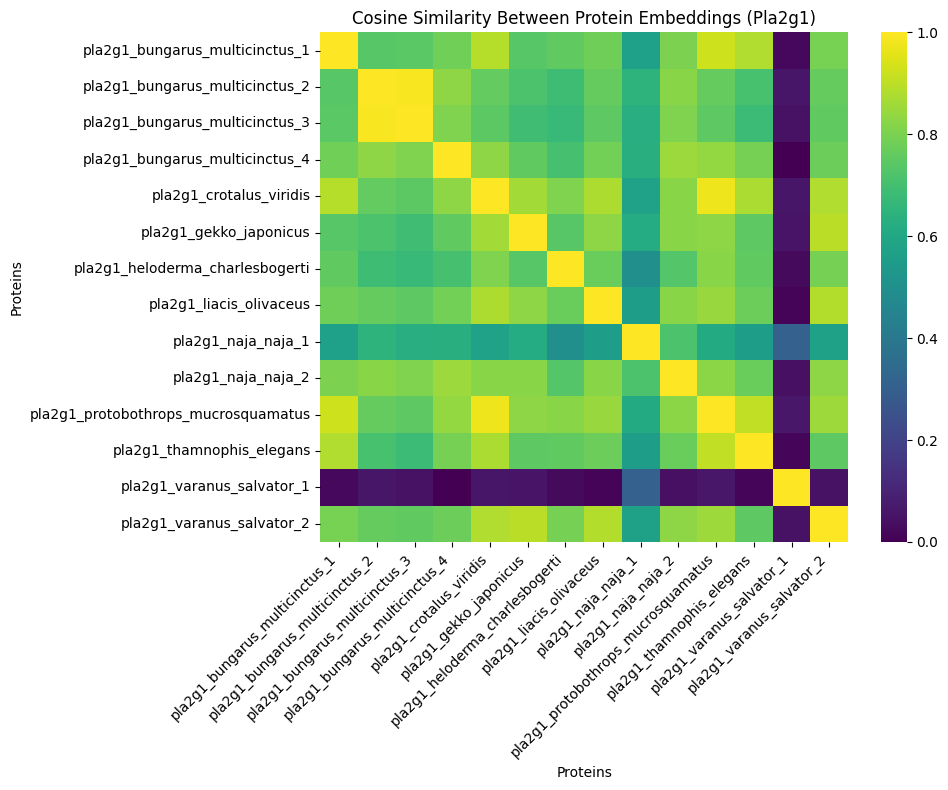

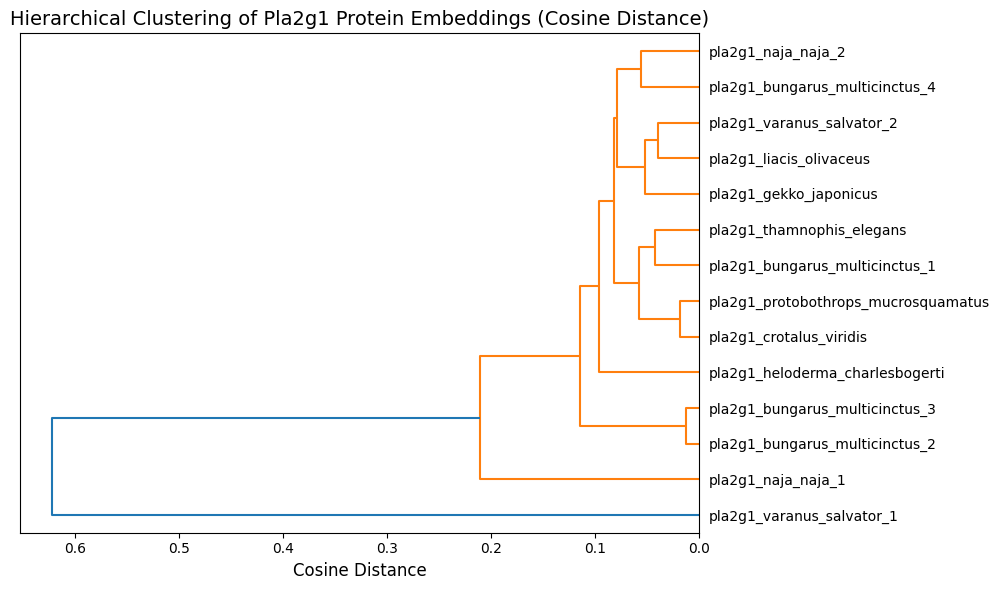

In [ ]:
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

# 📂 Upload .h5 file
print("📂 Please upload your .h5 file containing protein embeddings:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the uploaded filename

# Load embeddings from .h5 file
with h5py.File(file_name, "r") as h5_file:
    # Assuming embeddings are stored under a dataset named "embeddings"
    protein_names = list(h5_file.keys())
    embeddings = list(h5_file[prot_id][:] for prot_id in protein_names)

    # protein_names = list(h5_file["protein_names"]) if "protein_names" in h5_file else [f"Protein_{i}" for i in range(len(embeddings))]
    # embeddings = np.array(h5_file["embeddings"])

# Normalize protein names (if stored as bytes in HDF5)
protein_names = [name.decode('utf-8') if isinstance(name, bytes) else name for name in protein_names]

# Compute cosine similarity
cosine_sim_matrix = cosine_similarity(embeddings)

# Convert to Pandas DataFrame for better visualization
scaler = MinMaxScaler(feature_range=(0, 1))
cosine_sim_matrix_norm = scaler.fit_transform(cosine_sim_matrix)
cosine_sim_matrix_norm = (cosine_sim_matrix - cosine_sim_matrix.min())/(cosine_sim_matrix.max() - cosine_sim_matrix.min())
# Convert to Pandas DataFrame for better visualization
df_sim = pd.DataFrame(cosine_sim_matrix_norm, index=protein_names, columns=protein_names)

# 🔥 Plot heatmap with tilted x-axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(df_sim, annot=False, cmap="viridis", xticklabels=protein_names, yticklabels=protein_names, fmt=".2f", vmin=0, vmax=1)

plt.title("Cosine Similarity Between Protein Embeddings (Pla2g1)")
plt.xlabel("Proteins")
plt.ylabel("Proteins")

plt.xticks(rotation=45, ha='right')  # 🔁 Tilt and align x-axis labels
plt.tight_layout()  # 🧼 Prevent label cutoff
plt.show()


from scipy.cluster.hierarchy import linkage, dendrogram

# Convert cosine similarity to distance (1 - sim)
cosine_dist_matrix = 1 - cosine_sim_matrix

# Perform hierarchical clustering
linked = linkage(cosine_dist_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=protein_names,
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)  # auto-color branches

plt.title("Hierarchical Clustering of Pla2g1 Protein Embeddings (Cosine Distance)", fontsize=14)
plt.xlabel("Cosine Distance", fontsize=12)
plt.ylabel("")
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()

## pla2g3

📂 Please upload your .h5 file containing protein embeddings:


Saving pla2g3_annotations_proteins.h5 to pla2g3_annotations_proteins.h5


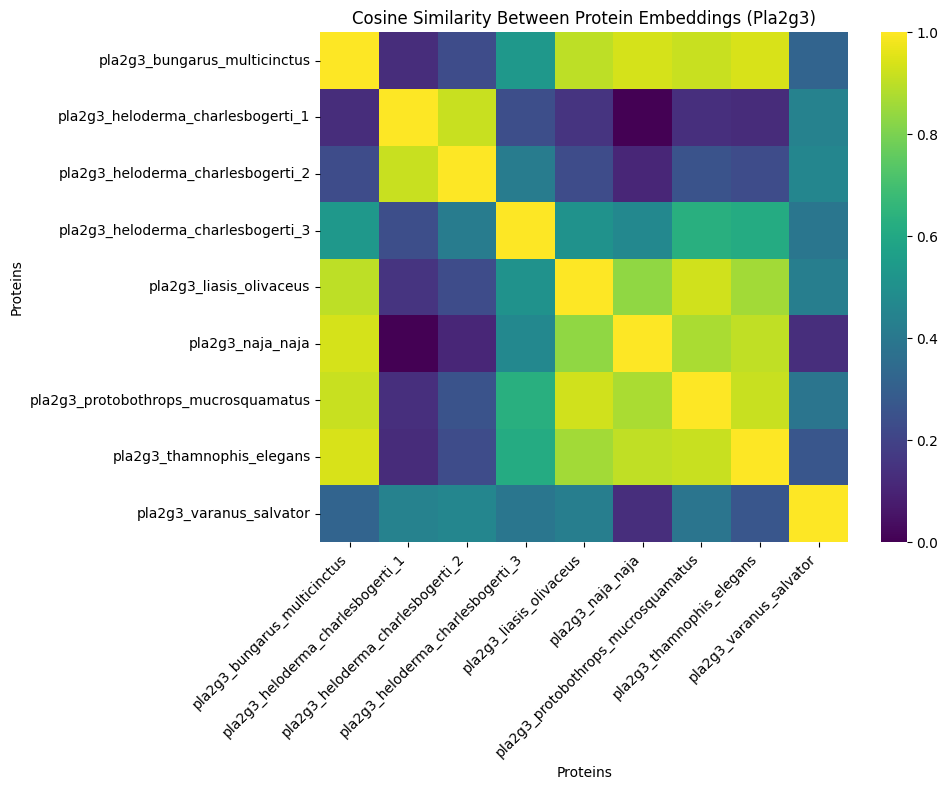

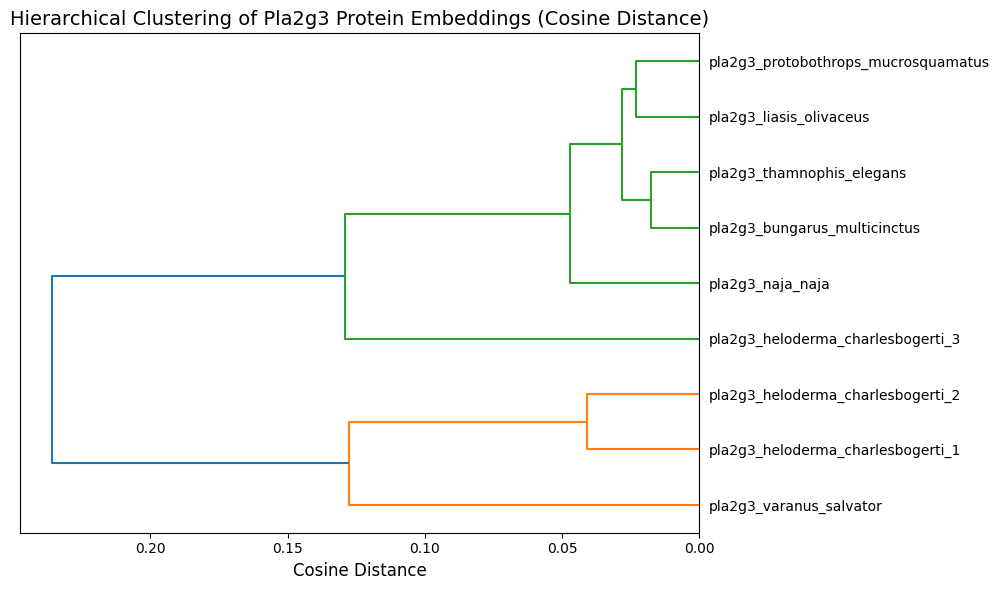

In [ ]:
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

# 📂 Upload .h5 file
print("📂 Please upload your .h5 file containing protein embeddings:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the uploaded filename

# Load embeddings from .h5 file
with h5py.File(file_name, "r") as h5_file:
    # Assuming embeddings are stored under a dataset named "embeddings"
    protein_names = list(h5_file.keys())
    embeddings = list(h5_file[prot_id][:] for prot_id in protein_names)

    # protein_names = list(h5_file["protein_names"]) if "protein_names" in h5_file else [f"Protein_{i}" for i in range(len(embeddings))]
    # embeddings = np.array(h5_file["embeddings"])

# Normalize protein names (if stored as bytes in HDF5)
protein_names = [name.decode('utf-8') if isinstance(name, bytes) else name for name in protein_names]

# Compute cosine similarity
cosine_sim_matrix = cosine_similarity(embeddings)

# Convert to Pandas DataFrame for better visualization
scaler = MinMaxScaler(feature_range=(0, 1))
cosine_sim_matrix_norm = scaler.fit_transform(cosine_sim_matrix)
cosine_sim_matrix_norm = (cosine_sim_matrix - cosine_sim_matrix.min())/(cosine_sim_matrix.max() - cosine_sim_matrix.min())
# Convert to Pandas DataFrame for better visualization
df_sim = pd.DataFrame(cosine_sim_matrix_norm, index=protein_names, columns=protein_names)

# 🔥 Plot heatmap with tilted x-axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(df_sim, annot=False, cmap="viridis", xticklabels=protein_names, yticklabels=protein_names, fmt=".2f", vmin=0, vmax=1)

plt.title("Cosine Similarity Between Protein Embeddings (Pla2g3)")
plt.xlabel("Proteins")
plt.ylabel("Proteins")

plt.xticks(rotation=45, ha='right')  # 🔁 Tilt and align x-axis labels
plt.tight_layout()  # 🧼 Prevent label cutoff
plt.show()


from scipy.cluster.hierarchy import linkage, dendrogram

# Convert cosine similarity to distance (1 - sim)
cosine_dist_matrix = 1 - cosine_sim_matrix

# Perform hierarchical clustering
linked = linkage(cosine_dist_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=protein_names,
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)  # auto-color branches

plt.title("Hierarchical Clustering of Pla2g3 Protein Embeddings (Cosine Distance)", fontsize=14)
plt.xlabel("Cosine Distance", fontsize=12)
plt.ylabel("")
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()

##Kunitz

📂 Please upload your .h5 file containing protein embeddings:


Saving annotations_shortKunitz_deneme.h5 to annotations_shortKunitz_deneme (1).h5


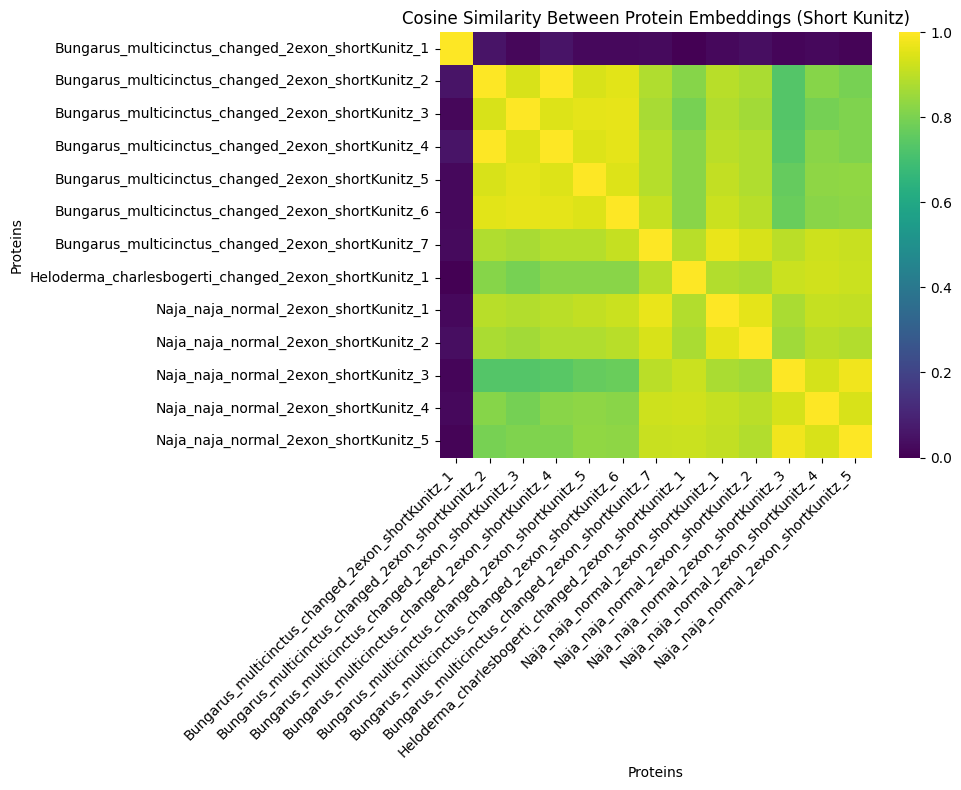

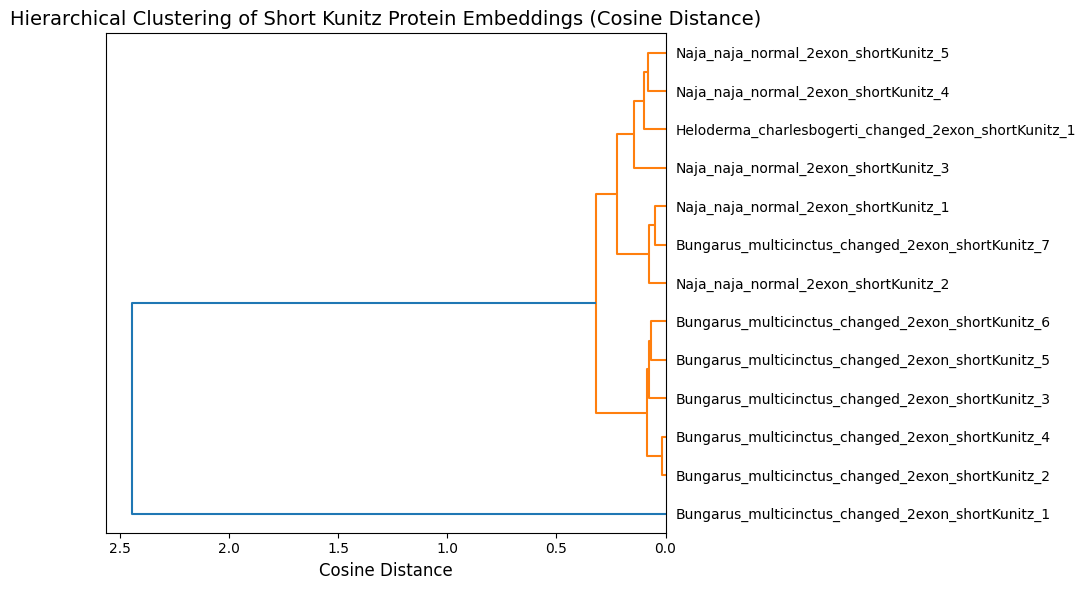

In [ ]:
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

# 📂 Upload .h5 file
print("📂 Please upload your .h5 file containing protein embeddings:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the uploaded filename

# Load embeddings from .h5 file
with h5py.File(file_name, "r") as h5_file:
    # Assuming embeddings are stored under a dataset named "embeddings"
    protein_names = list(h5_file.keys())
    embeddings = list(h5_file[prot_id][:] for prot_id in protein_names)

    # protein_names = list(h5_file["protein_names"]) if "protein_names" in h5_file else [f"Protein_{i}" for i in range(len(embeddings))]
    # embeddings = np.array(h5_file["embeddings"])

# Normalize protein names (if stored as bytes in HDF5)
protein_names = [name.decode('utf-8') if isinstance(name, bytes) else name for name in protein_names]

# Compute cosine similarity
cosine_sim_matrix = cosine_similarity(embeddings)

# Convert to Pandas DataFrame for better visualization
scaler = MinMaxScaler(feature_range=(0, 1))
cosine_sim_matrix_norm = scaler.fit_transform(cosine_sim_matrix)
cosine_sim_matrix_norm = (cosine_sim_matrix - cosine_sim_matrix.min())/(cosine_sim_matrix.max() - cosine_sim_matrix.min())
# Convert to Pandas DataFrame for better visualization
df_sim = pd.DataFrame(cosine_sim_matrix_norm, index=protein_names, columns=protein_names)

# 🔥 Plot heatmap with tilted x-axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(df_sim, annot=False, cmap="viridis", xticklabels=protein_names, yticklabels=protein_names, fmt=".2f", vmin=0, vmax=1)

plt.title("Cosine Similarity Between Protein Embeddings (Short Kunitz)")
plt.xlabel("Proteins")
plt.ylabel("Proteins")

plt.xticks(rotation=45, ha='right')  # 🔁 Tilt and align x-axis labels
plt.tight_layout()  # 🧼 Prevent label cutoff
plt.show()


from scipy.cluster.hierarchy import linkage, dendrogram

# Convert cosine similarity to distance (1 - sim)
cosine_dist_matrix = 1 - cosine_sim_matrix

# Perform hierarchical clustering
linked = linkage(cosine_dist_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=protein_names,
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)  # auto-color branches

plt.title("Hierarchical Clustering of Short Kunitz Protein Embeddings (Cosine Distance)", fontsize=14)
plt.xlabel("Cosine Distance", fontsize=12)
plt.ylabel("")
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()

##Kuwap

📂 Please upload your .h5 file containing protein embeddings:


Saving annotations_kuwap_deneme.h5 to annotations_kuwap_deneme (3).h5


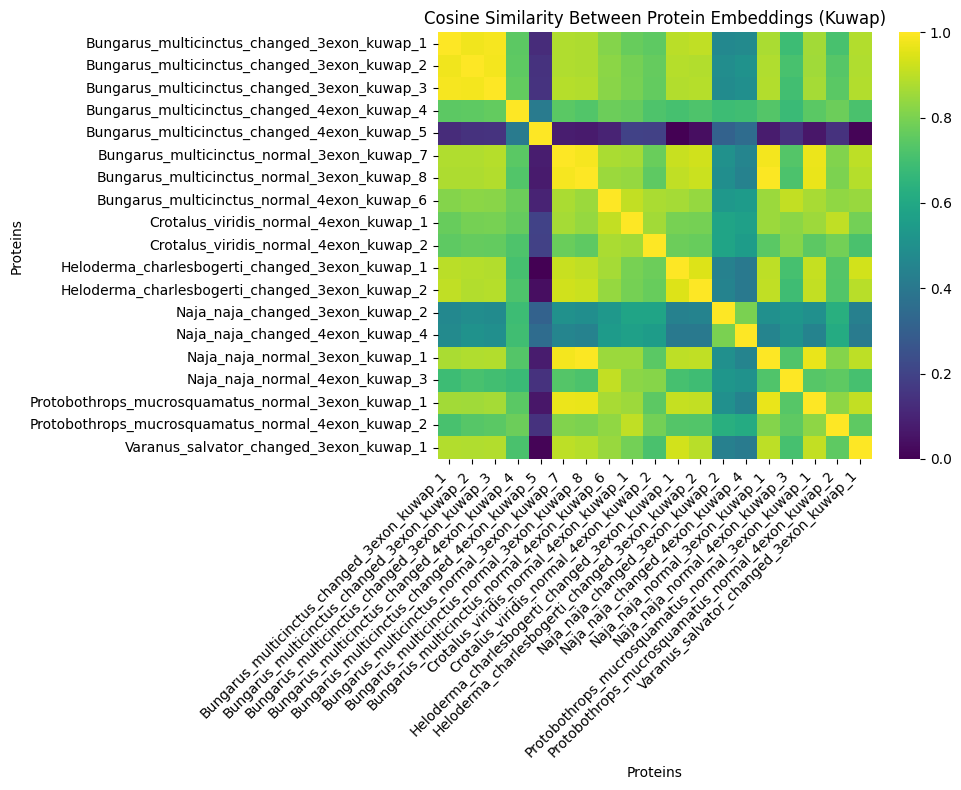

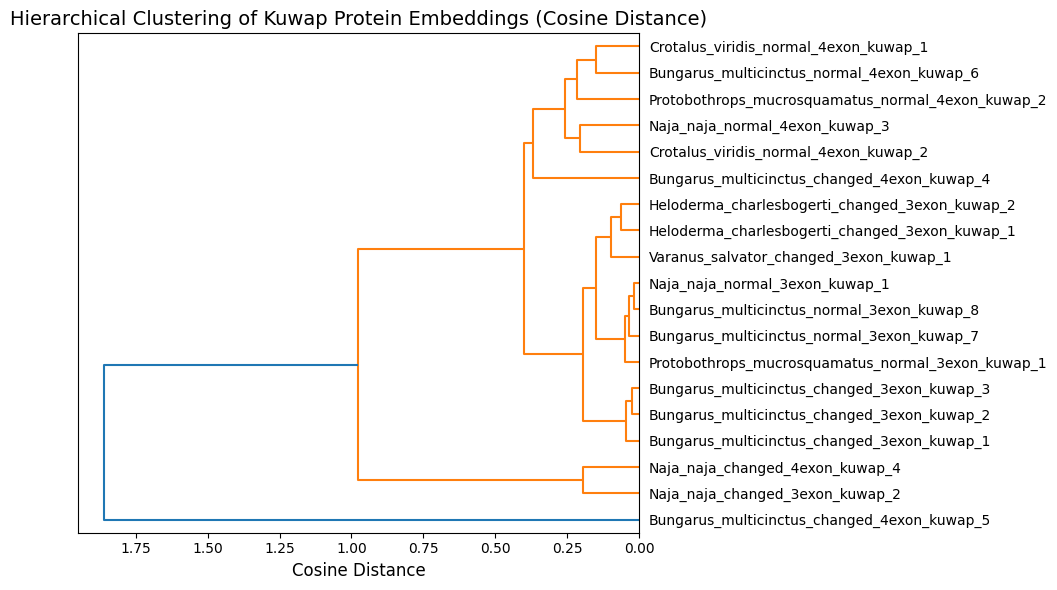

In [ ]:
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

# 📂 Upload .h5 file
print("📂 Please upload your .h5 file containing protein embeddings:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the uploaded filename

# Load embeddings from .h5 file
with h5py.File(file_name, "r") as h5_file:
    # Assuming embeddings are stored under a dataset named "embeddings"
    protein_names = list(h5_file.keys())
    embeddings = list(h5_file[prot_id][:] for prot_id in protein_names)

    # protein_names = list(h5_file["protein_names"]) if "protein_names" in h5_file else [f"Protein_{i}" for i in range(len(embeddings))]
    # embeddings = np.array(h5_file["embeddings"])

# Normalize protein names (if stored as bytes in HDF5)
protein_names = [name.decode('utf-8') if isinstance(name, bytes) else name for name in protein_names]

# Compute cosine similarity
cosine_sim_matrix = cosine_similarity(embeddings)

# Convert to Pandas DataFrame for better visualization
scaler = MinMaxScaler(feature_range=(0, 1))
cosine_sim_matrix_norm = scaler.fit_transform(cosine_sim_matrix)
cosine_sim_matrix_norm = (cosine_sim_matrix - cosine_sim_matrix.min())/(cosine_sim_matrix.max() - cosine_sim_matrix.min())
# Convert to Pandas DataFrame for better visualization
df_sim = pd.DataFrame(cosine_sim_matrix_norm, index=protein_names, columns=protein_names)

# 🔥 Plot heatmap with tilted x-axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(df_sim, annot=False, cmap="viridis", xticklabels=protein_names, yticklabels=protein_names, fmt=".2f", vmin=0, vmax=1)

plt.title("Cosine Similarity Between Protein Embeddings (Kuwap)")
plt.xlabel("Proteins")
plt.ylabel("Proteins")

plt.xticks(rotation=45, ha='right')  # 🔁 Tilt and align x-axis labels
plt.tight_layout()  # 🧼 Prevent label cutoff
plt.show()


from scipy.cluster.hierarchy import linkage, dendrogram

# Convert cosine similarity to distance (1 - sim)
cosine_dist_matrix = 1 - cosine_sim_matrix

# Perform hierarchical clustering
linked = linkage(cosine_dist_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=protein_names,
           orientation='left',
           leaf_font_size=10,
           color_threshold=None)  # auto-color branches

plt.title("Hierarchical Clustering of Kuwap Protein Embeddings (Cosine Distance)", fontsize=14)
plt.xlabel("Cosine Distance", fontsize=12)
plt.ylabel("")
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()

## ML DATA VIS


Upload the MMseqs TSV file (similarity results):


Saving SONN_cluster_split_filtered_4000.tsv to SONN_cluster_split_filtered_4000 (1).tsv

Upload the CSV file (toxic/non-toxic pairs):


Saving RBH_SON.csv to RBH_SON (1).csv


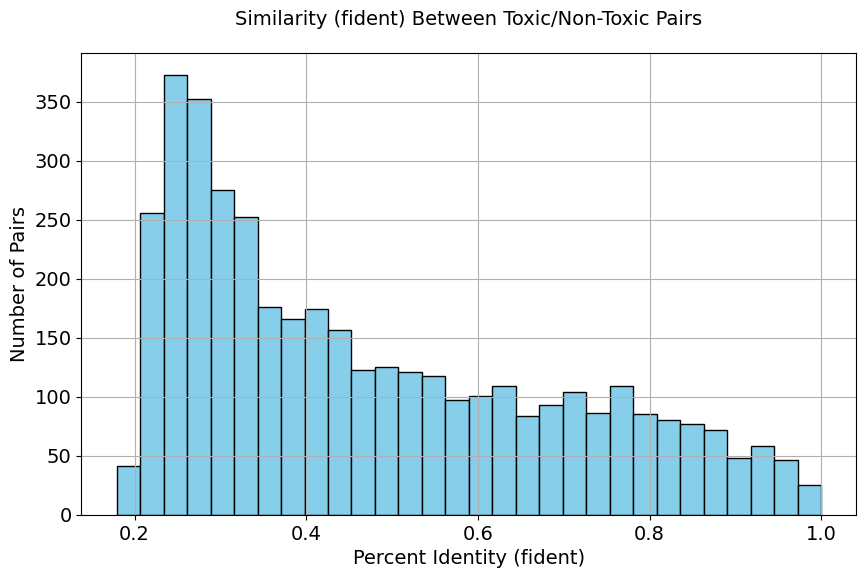

Found similarity scores for 3983 out of 4007 pairs.
Mean fident: 0.47
Min fident: 0.18
Max fident: 1.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# 📂 Upload MMseqs TSV and cluster pairs CSV
print("Upload the MMseqs TSV file (similarity results):")
tsv_uploaded = files.upload()

print("\nUpload the CSV file (toxic/non-toxic pairs):")
csv_uploaded = files.upload()

# 📄 Load files
tsv_file = list(tsv_uploaded.keys())[0]
csv_file = list(csv_uploaded.keys())[0]

mmseqs_df = pd.read_csv(tsv_file, sep='\t', header=None)
mmseqs_df.columns = [
    'query', 'target', 'fident', 'alnlen', 'mismatch', 'gapopen',
    'qstart', 'qend', 'tstart', 'tend', 'evalue', 'bits'
]

pairs_df = pd.read_csv(csv_file)

# 🔍 Merge to find similarity for each (toxic_id, non_toxic_id) pair
merged_df = pd.merge(
    pairs_df,
    mmseqs_df,
    how='left',
    left_on=['toxic_id', 'non_toxic_id'],
    right_on=['query', 'target']
)

# 🔄 If no direct match found, try flipped (non_toxic_id, toxic_id)
missing = merged_df['fident'].isna()
if missing.any():
    flipped = pd.merge(
        pairs_df[missing],
        mmseqs_df,
        how='left',
        left_on=['non_toxic_id', 'toxic_id'],
        right_on=['query', 'target']
    )
    merged_df.loc[missing, 'fident'] = flipped['fident'].values

# 📉 Drop any still-missing scores
filtered_df = merged_df.dropna(subset=['fident'])

# 📊 Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['fident'], bins=30, color='skyblue', edgecolor='black')
plt.title("Similarity (fident) Between Toxic/Non-Toxic Pairs", fontsize=14, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Percent Identity (fident)", fontsize=14)
plt.ylabel("Number of Pairs", fontsize=14)
plt.grid(True)
plt.show()

# 🧾 Optional: Show stats
print(f"Found similarity scores for {len(filtered_df)} out of {len(pairs_df)} pairs.")
print(f"Mean fident: {filtered_df['fident'].mean():.2f}")
print(f"Min fident: {filtered_df['fident'].min():.2f}")
print(f"Max fident: {filtered_df['fident'].max():.2f}")


## ML DATA VIS CONTINUED


Saving RBH_SON.csv to RBH_SON (5).csv
First few rows of the dataset:
  cluster_id    toxic_id non_toxic_id  \
0  IPR036412  A0A2D4EVW5   A0A8D0DZU9   
1  IPR036412  A0A2D4H1X0   A0A8D0DT47   
2  IPR036412  A0A2D4HN45   A0AA35L9Q6   
3  IPR036412  A0AAW1BEX2   A0AA35KYW7   
4  IPR036412      V8NEF7   A0AA97K002   

                                      toxic_sequence  \
0  MEDKLPLMIEWWTKAHNLLSQENILKNDIAQIVKESDVKLRDGFNI...   
1  TTIIPMDETTHFVAITAGSESDPGTVDSDDTASTPIIKPTPVFPSG...   
2  IGVVGGSDYSKIAEQLGEGNEVINKFDYVFAENGTVQYKNGQLVSK...   
3  MAGVRFCFSLADGQRKQLSLGFGSLAIGRPRSPPRNSGCQSIERPP...   
4  MVPELQKITVRMKNPEHVKNIVSALRKDGAARLQVISDFDMTLTRF...   

                                  non_toxic_sequence  
0  MDKSAVAKMGAVASASVCALVGGVVLAQYIFTIKKKTGRKTKIIEM...  
1  MNYVGQLAGQVLVTVKELYKGINQATLSGCIDVIVVRQQDGTFLCS...  
2  MEEVGRGRTLCLFDVDGTLTAPRQKVTPDMADFLQALRKKVKVGVV...  
3  MAGCRRLSGSCLREVLGEAQGVLFDCDGVLWTGERAVPGAPELLER...  
4  MQALHLWTLITTCAVAVGKIQEQKNQECPKLSTQMPEFQKKTVHIK...  

Column names:
In

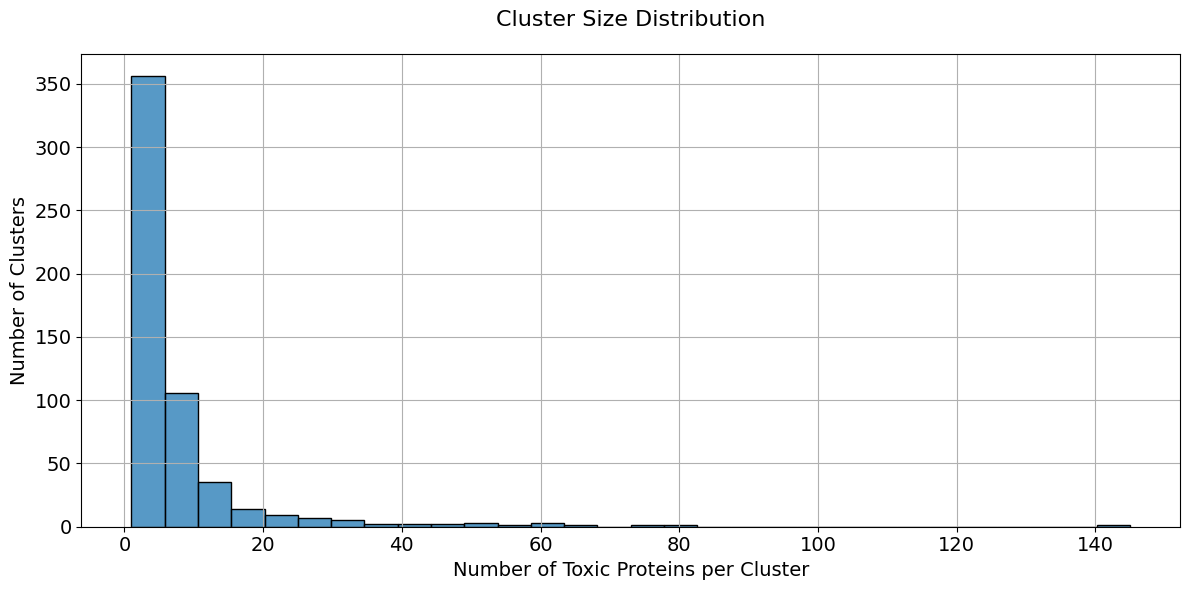

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Upload your CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Read CSV file (assuming there's only one file uploaded)
import io

# Automatically detect the file name from the upload
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=None, engine='python')  # auto-detect separator

# Step 4: Quick sanity checks
print("First few rows of the dataset:")
print(df.head())

print("\nColumn names:")
print(df.columns)

# Optional: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 5: Check for duplicates in toxic_id (should be one per row ideally)
duplicates = df.duplicated(subset=['toxic_id'])
print(f"\nNumber of duplicated toxic_ids: {duplicates.sum()}")

# Step 6: Calculate cluster sizes
cluster_counts = df['cluster_id'].value_counts().sort_values(ascending=False)

# Step 7: Plot cluster size distribution
plt.figure(figsize=(12, 6))
sns.histplot(cluster_counts, bins=30, kde=False)
plt.title('Cluster Size Distribution', pad=20, fontsize=16)
plt.xlabel('Number of Toxic Proteins per Cluster', fontsize=14)
plt.ylabel('Number of Clusters', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()







Saving RBH_SON.csv to RBH_SON (8).csv
First few rows:
  cluster_id    toxic_id non_toxic_id  \
0  IPR036412  A0A2D4EVW5   A0A8D0DZU9   
1  IPR036412  A0A2D4H1X0   A0A8D0DT47   
2  IPR036412  A0A2D4HN45   A0AA35L9Q6   
3  IPR036412  A0AAW1BEX2   A0AA35KYW7   
4  IPR036412      V8NEF7   A0AA97K002   

                                      toxic_sequence  \
0  MEDKLPLMIEWWTKAHNLLSQENILKNDIAQIVKESDVKLRDGFNI...   
1  TTIIPMDETTHFVAITAGSESDPGTVDSDDTASTPIIKPTPVFPSG...   
2  IGVVGGSDYSKIAEQLGEGNEVINKFDYVFAENGTVQYKNGQLVSK...   
3  MAGVRFCFSLADGQRKQLSLGFGSLAIGRPRSPPRNSGCQSIERPP...   
4  MVPELQKITVRMKNPEHVKNIVSALRKDGAARLQVISDFDMTLTRF...   

                                  non_toxic_sequence  
0  MDKSAVAKMGAVASASVCALVGGVVLAQYIFTIKKKTGRKTKIIEM...  
1  MNYVGQLAGQVLVTVKELYKGINQATLSGCIDVIVVRQQDGTFLCS...  
2  MEEVGRGRTLCLFDVDGTLTAPRQKVTPDMADFLQALRKKVKVGVV...  
3  MAGCRRLSGSCLREVLGEAQGVLFDCDGVLWTGERAVPGAPELLER...  
4  MQALHLWTLITTCAVAVGKIQEQKNQECPKLSTQMPEFQKKTVHIK...  


<ipython-input-10-f6ea806b1b12>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clusters.values, y=top_clusters.index, palette='viridis')


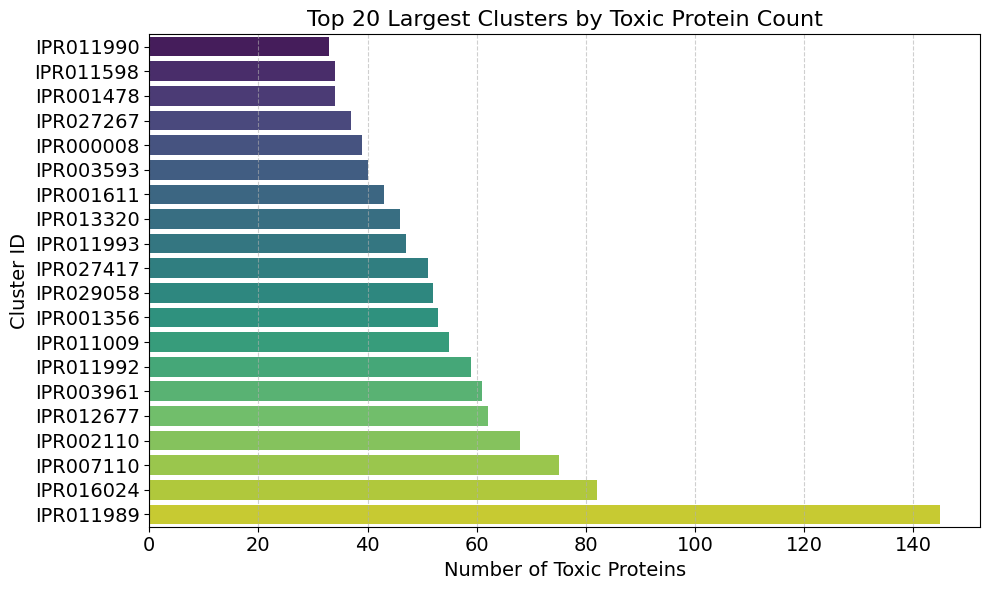

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Read the CSV file
import io
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=None, engine='python')

# Step 4: Sanity check
print("First few rows:")
print(df.head())

# Step 5: Count toxic proteins per cluster
cluster_counts = df['cluster_id'].value_counts()

# Step 6: Select the top 20 clusters
top_clusters = cluster_counts.head(20).sort_values(ascending=True)  # sorted for nicer barplot

# Step 7: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clusters.values, y=top_clusters.index, palette='viridis')
plt.xlabel("Number of Toxic Proteins", fontsize=14)
plt.ylabel("Cluster ID", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Top 20 Largest Clusters by Toxic Protein Count", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Saving RBH_SON.csv to RBH_SON (10).csv
Found 4007 unique toxic protein IDs
Processed 0/4007
Processed 50/4007
Processed 100/4007
Processed 150/4007
Processed 200/4007
Processed 250/4007
Processed 300/4007
Processed 350/4007
Processed 400/4007
Processed 450/4007
Processed 500/4007
Processed 550/4007
Processed 600/4007
Processed 650/4007
Processed 700/4007
Processed 750/4007
Processed 800/4007
Processed 850/4007
Processed 900/4007
Processed 950/4007
Processed 1000/4007
Processed 1050/4007
Processed 1100/4007
Processed 1150/4007
Processed 1200/4007
Processed 1250/4007
Processed 1300/4007
Processed 1350/4007
Processed 1400/4007
Processed 1450/4007
Processed 1500/4007
Processed 1550/4007
Processed 1600/4007
Processed 1650/4007
Processed 1700/4007
Processed 1750/4007
Processed 1800/4007
Processed 1850/4007
Processed 1900/4007
Processed 1950/4007
Processed 2000/4007
Processed 2050/4007
Processed 2100/4007
Processed 2150/4007
Processed 2200/4007
Processed 2250/4007
Processed 2300/4007
Processe

<ipython-input-12-d829b3fb9f1e>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_counts.values, y=species_counts.index, palette='mako')


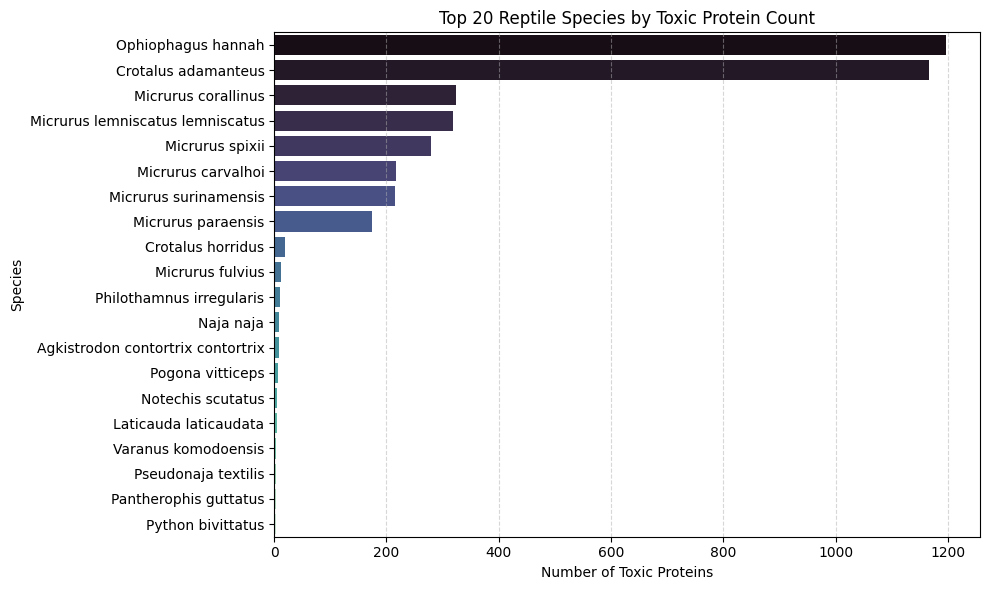

In [ ]:
# Step 1: Install requests library if not already available
!pip install requests -q

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from google.colab import files
import io

# Step 3: Upload CSV
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 4: Get unique toxic_ids
toxic_ids = df['toxic_id'].unique()
print(f"Found {len(toxic_ids)} unique toxic protein IDs")

# Step 5: Function to fetch species info from UniProt
def get_species_name(uniprot_id):
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data.get("organism", {}).get("scientificName", None)
        else:
            return None
    except:
        return None

# Step 6: Query UniProt for each toxic_id
species_lookup = {}
for i, uniprot_id in enumerate(toxic_ids):
    species = get_species_name(uniprot_id)
    species_lookup[uniprot_id] = species
    time.sleep(0.3)  # be nice to the API, avoid rate limits
    if i % 50 == 0:
        print(f"Processed {i}/{len(toxic_ids)}")

# Step 7: Map species info to dataframe
df['species_name'] = df['toxic_id'].map(species_lookup)

# Step 8: Check if any species were not found
missing_species = df['species_name'].isnull().sum()
print(f"Missing species info for {missing_species} proteins.")

# Step 9: Count species frequencies (top 20)
species_counts = df['species_name'].value_counts().head(20)

# Step 10: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=species_counts.values, y=species_counts.index, palette='mako')
plt.xlabel("Number of Toxic Proteins")
plt.ylabel("Species")
plt.title("Top 20 Reptile Species by Toxic Protein Count")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

